## Context

This is the dataset is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being too toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

## Source

This data was entirely modified and cleaned by: https://www.kaggle.com/fedesoriano. The original data (without the distance features) was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

The original dataset can be found under the following link: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

## Modifications with respect to the original data

This dataset includes 5 extra features defined by https://www.kaggle.com/fedesoriano : "Distance to coast", "Distance to Los Angeles", "Distance to San Diego", "Distance to San Jose", and "Distance to San Francisco". These extra features try to account for the distance to the nearest coast and the distance to the centre of the largest cities in California.

The distances were calculated using the Haversine formula with the Longitude and Latitude:

https://wikimedia.org/api/rest_v1/media/math/render/svg/a65dbbde43ff45bacd2505fcf32b44fc7dcd8cc0

where:

* phi_1 and phi_2 are the Latitudes of point 1 and point 2, respectively;
* lambda_1 and lambda_2 are the Longitudes of point 1 and point 2, respectively;
* r is the radius of the Earth (6371km);

## Data set summary

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

* 1) Median House Value: Median house value for households within a block (measured in US Dollars);
* 2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) `10k$`
* 3) Median Age: Median age of a house within a block; a lower number is a newer building [years];
* 4) Total Rooms: Total number of rooms within a block;
* 5) Total Bedrooms: Total number of bedrooms within a block;
* 6) Population: Total number of people residing within a block;
* 7) Households: Total number of households, a group of people residing within a home unit, for a block;
* 8) Latitude: A measure of how far north a house is; a higher value is farther north [°];
* 9) Longitude: A measure of how far west a house is; a higher value is farther west [°];
* 10) Distance to coast: Distance to the nearest coast point [m];
* 11) Distance to Los Angeles: Distance to the centre of Los Angeles [m];
* 12) Distance to San Diego: Distance to the centre of San Diego [m];
* 13) Distance to San Jose: Distance to the centre of San Jose [m];
* 14) Distance to San Francisco: Distance to the centre of San Francisco [m].

## Main objective

Training a model that is balanced and can generalize well on the new incoming data, avoid overfitting and also underfitting and find the best parameters to use on this dataset for a linear regression model. (paynomial featuring, standardization, regularization)

Can I do it?

## Importing libraries and loading up the tools 

In [1]:
# Data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots to appear inside the notebook 
%matplotlib inline

# Models importing from Scikit-Learn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

## Load data

In [2]:
# Read and load California Housing dataset
df = pd.read_csv('data/California_Houses.csv')

data_copy = df.copy() # Keep a copy of original data 

In [3]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Data Exploration: EDA (cleaning and feature engineering )

In [4]:
df.shape # (rows, columns)

(20640, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

We can see that:

* There are 20,640 instances in the dataset.

* There are no missing values.

* All the values are numeric (float or int).

Next, let"s display some statistical summaries of the numerical columns:

In [6]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [7]:
# Get the total unique values for each column
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Median_House_Value,3842
Median_Income,12928
Median_Age,52
Tot_Rooms,5926
Tot_Bedrooms,1928
Population,3888
Households,1815
Latitude,862
Longitude,844
Distance_to_coast,12590


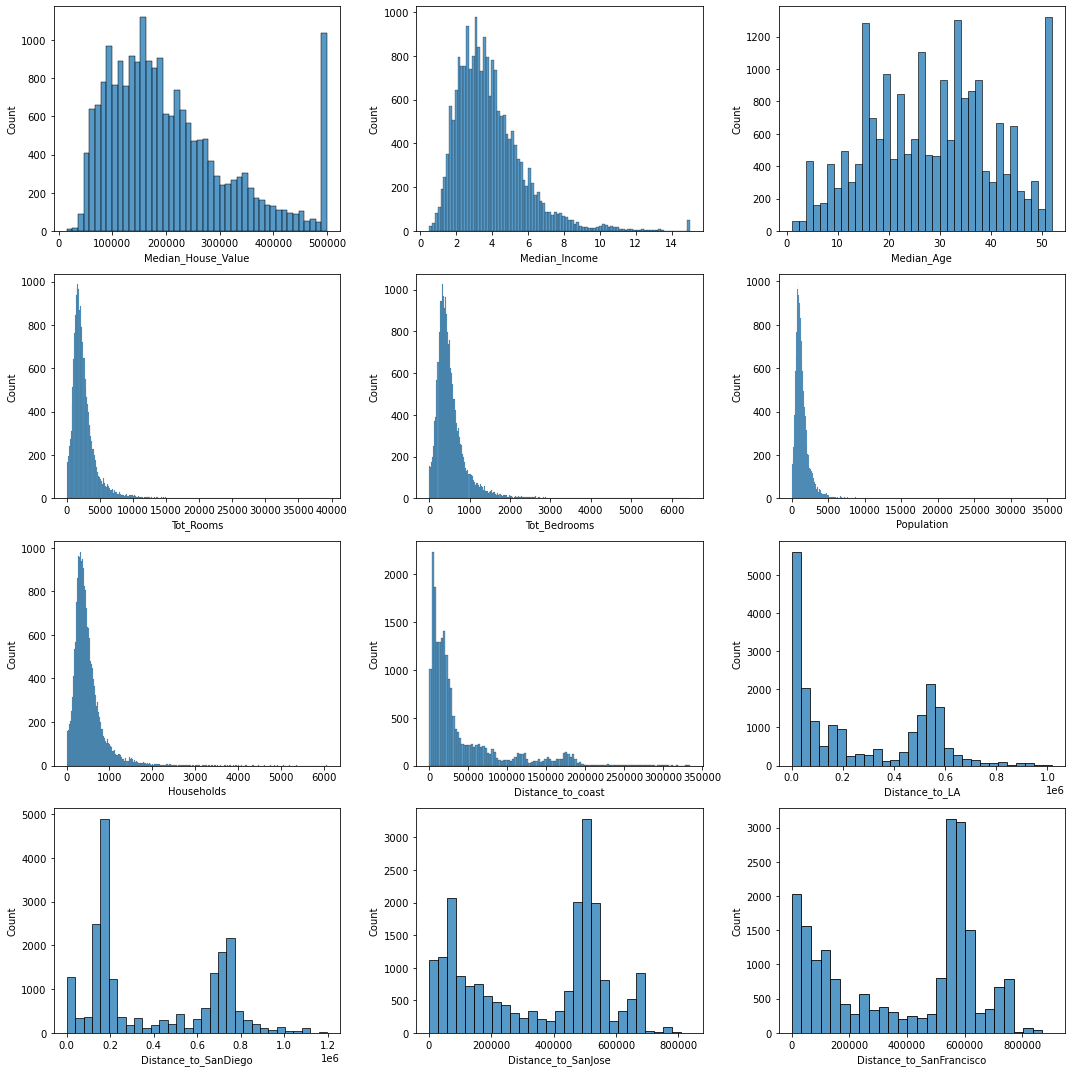

In [8]:
# Display a histogram for each value except Latitude and Longitude
fig, ax = plt.subplots(4, 3, figsize=[15,15])
sns.histplot(data=df, x="Median_House_Value", ax=ax[0, 0])
sns.histplot(data=df, x="Median_Income", ax=ax[0, 1])
sns.histplot(data=df, x="Median_Age", ax=ax[0, 2])
sns.histplot(data=df, x="Tot_Rooms", ax=ax[1, 0])
sns.histplot(data=df, x="Tot_Bedrooms", ax=ax[1, 1])
sns.histplot(data=df, x="Population", ax=ax[1, 2])
sns.histplot(data=df, x="Households", ax=ax[2, 0])
sns.histplot(data=df, x="Distance_to_coast", ax=ax[2, 1])
sns.histplot(data=df, x="Distance_to_LA", ax=ax[2, 2])
sns.histplot(data=df, x="Distance_to_SanDiego", ax=ax[3, 0])
sns.histplot(data=df, x="Distance_to_SanJose", ax=ax[3, 1])
sns.histplot(data=df, x="Distance_to_SanFrancisco", ax=ax[3, 2])
fig.tight_layout()
plt.show()

A few things in these histograms we should notice:

* The attributes have very different scales - we should perform feature scaling;

* Many histograms are tail heavy - they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We need to transform these to have more bell-shaped distributions.

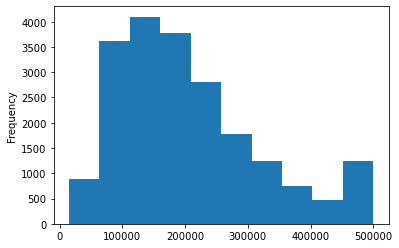

In [9]:
# Chech distribution of the MEDV column with a histogram
df.Median_House_Value.plot.hist();

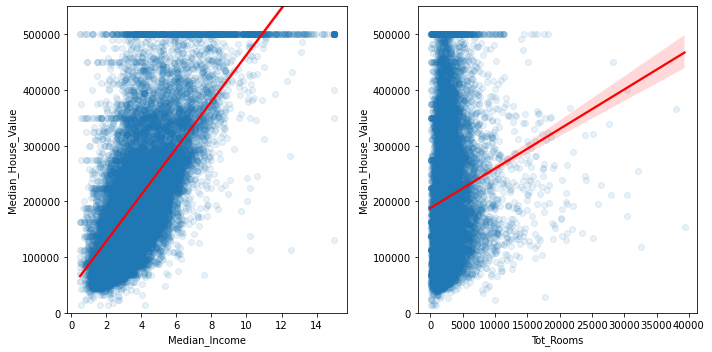

In [12]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.regplot(data=df, x="Median_Income", y="Median_House_Value",
            line_kws={"color": "red"}, scatter_kws={"alpha":0.1}, ax=ax[0])
sns.regplot(data=df, x="Tot_Rooms",
            y="Median_House_Value", line_kws={"color": "red"},
            scatter_kws={"alpha":0.1}, ax=ax[1])
ax[0].set(ylim=(0, 550000))
ax[1].set(ylim=(0, 550000))
fig.tight_layout()
plt.show()

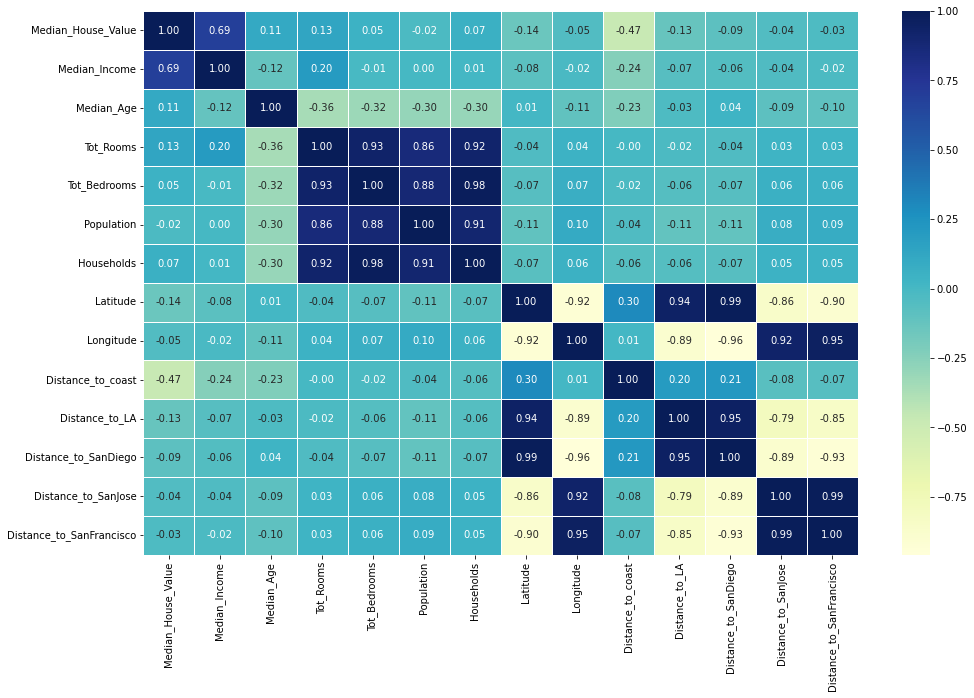

In [13]:
# Make correlation matrix a litle prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Choose Models , fit and score the ML models

## Add Polynomial and Regularization Techniques: Ridge, LASSO, and Elastic Net

## Evaluate